In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)

In [67]:
gene_df = pd.read_csv('../Machine_Learning/Datasets/gene_expression.csv')

In [68]:
gene_df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [69]:
gene_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


## #Data Visualization and Data Analysis

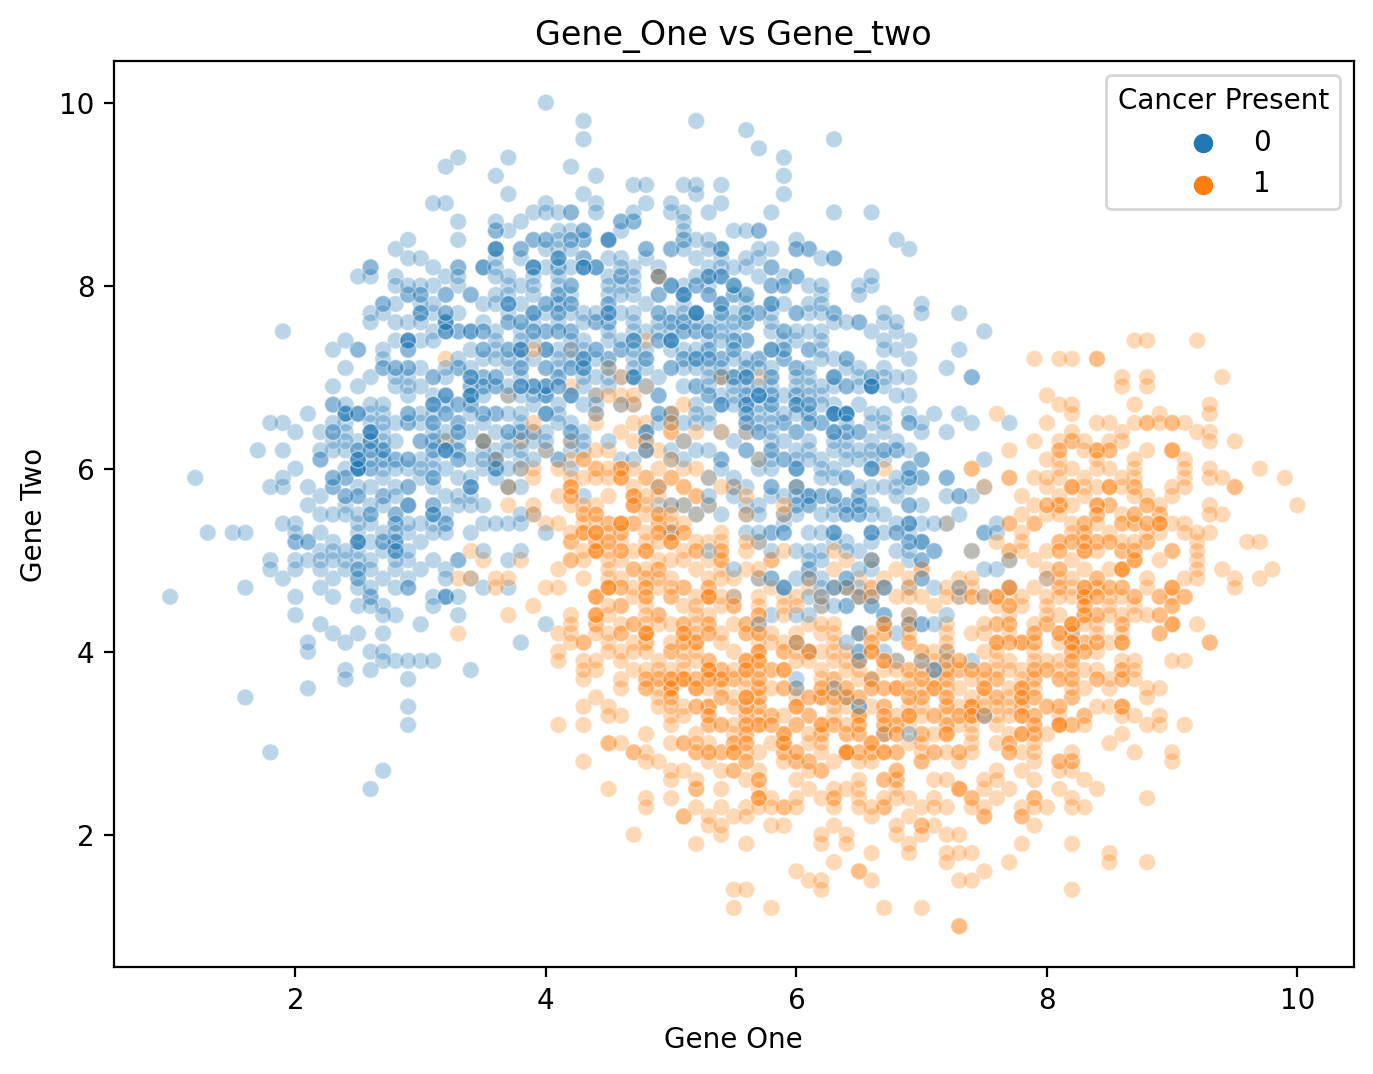

In [70]:
plt.figure(figsize=(8,6),dpi=200)
sns.scatterplot(data=gene_df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha=0.3)
plt.title('Gene_One vs Gene_two')
plt.show()

<Figure size 1200x900 with 0 Axes>

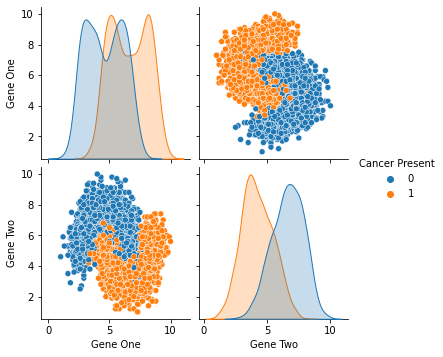

In [71]:
plt.figure(figsize=(8,6),dpi=150)
sns.pairplot(data=gene_df,diag_kind='kde',hue='Cancer Present')
plt.show()

## #Model build and Preprocessing

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [167]:
X = gene_df.drop(columns='Cancer Present',axis=1).values
y= gene_df['Cancer Present'].values

In [168]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [169]:
print("X_train:- ",X_train.shape)
print('X_test:- ',X_test.shape)
print('y_train:- ',y_train.shape)
print('y_test:- ',y_test.shape)

X_train:-  (2100, 2)
X_test:-  (900, 2)
y_train:-  (2100,)
y_test:-  (900,)


In [170]:
std_sclar = StandardScaler()

In [171]:
sclar_Xtrain = std_sclar.fit_transform(X_train)
sclar_Xtest = std_sclar.transform(X_test)

## #KNN 

In [172]:
from sklearn.neighbors import KNeighborsClassifier

In [173]:
knn_model = KNeighborsClassifier()

In [174]:
knn_model.fit(sclar_Xtrain,y_train)

KNeighborsClassifier()

In [175]:
y_pred = knn_model.predict(sclar_Xtest)

## #Model Performance

In [176]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

In [177]:
accuracy_score(y_test,y_pred)

0.9288888888888889

In [178]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.93       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



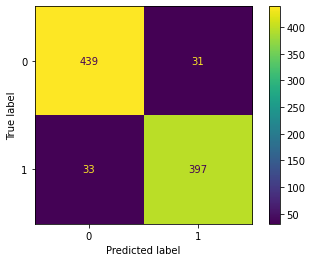

In [179]:
#confusion matrix
plot_confusion_matrix(knn_model,sclar_Xtest,y_test)

In [180]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## #Best K value for to minimise Accuracy Error

In [181]:
test_error_for_k = []
for k in range(1,30):
    knear_model = KNeighborsClassifier(n_neighbors=k)
    knear_model.fit(sclar_Xtrain,y_train)
    k_ypred = knear_model.predict(sclar_Xtest)
    error = 1 - accuracy_score(y_test,k_ypred)
    test_error_for_k.append(error)

In [182]:
test_error_for_k

[0.09888888888888892,
 0.09777777777777774,
 0.0755555555555556,
 0.07444444444444442,
 0.07111111111111112,
 0.06444444444444442,
 0.06444444444444442,
 0.06000000000000005,
 0.05888888888888888,
 0.06222222222222218,
 0.061111111111111116,
 0.05888888888888888,
 0.061111111111111116,
 0.06333333333333335,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.054444444444444406,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05666666666666664,
 0.05666666666666664,
 0.05888888888888888,
 0.05777777777777782]

## #error  plot

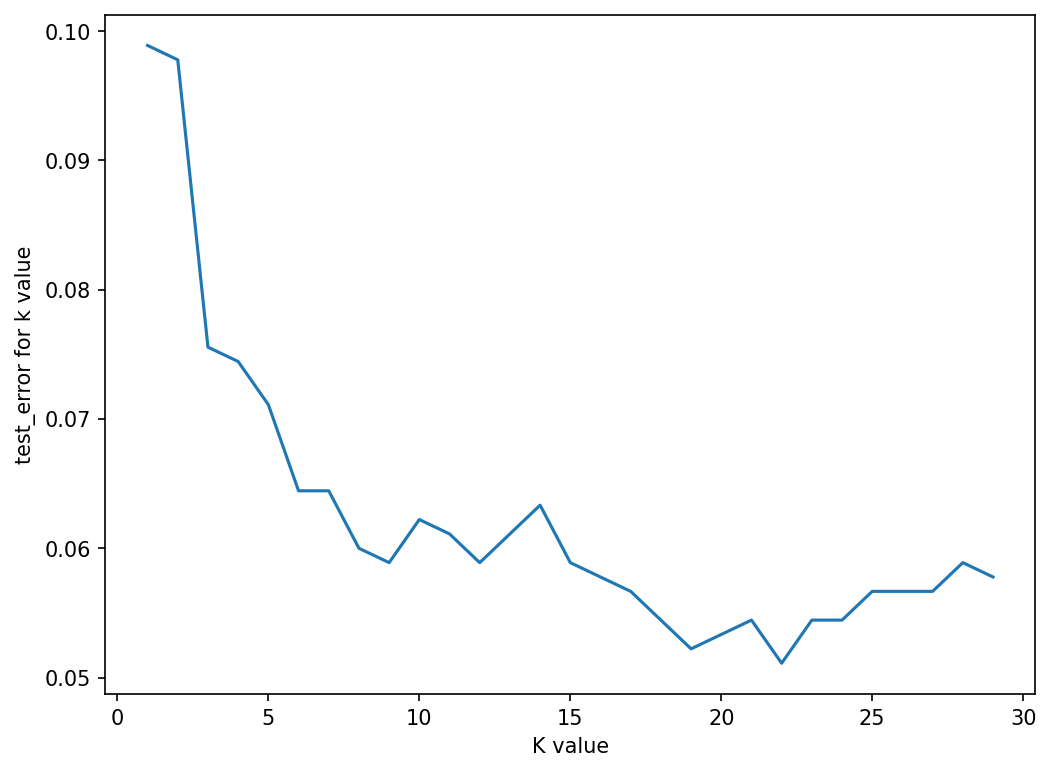

In [183]:
plt.figure(figsize=(8,6),dpi=150)
plt.plot(range(1,30),test_error_for_k)
plt.ylabel('test_error for k value')
plt.xlabel('K value')
plt.show()

## #Pipeline ----->GridSearchCV for to K value.

In [184]:
knn = KNeighborsClassifier()

In [185]:
scaler = StandardScaler()

In [186]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [187]:
operations = [('scaler',scaler),('knn',knn)]

In [188]:
from sklearn.pipeline import Pipeline

In [189]:
pipe = Pipeline(operations)

In [190]:
from sklearn.model_selection import GridSearchCV

In [191]:
k_values = list(range(1,21)) 
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [192]:
param_grid = {'knn__n_neighbors':k_values}

In [193]:
cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [194]:
cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20]},
             scoring='accuracy')

In [195]:
cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=20))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=20),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 20,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [196]:
full_pred = cv_classifier.predict(X_test)

In [197]:
accuracy_score(y_test,full_pred)

0.9466666666666667

In [198]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



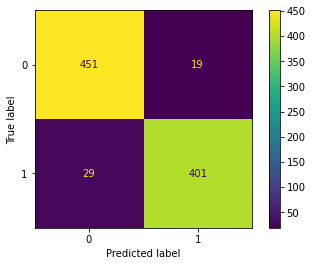

In [199]:
plot_confusion_matrix(cv_classifier,X_test,y_test)

## #test the result giving new parameter to the trained model

In [200]:
new_patient = pd.DataFrame(np.array([3.5,6.2,3.6,5.4,6.1,6.2]).reshape(3,2),columns=[['Gene One','Gene Two']])

In [201]:
new_patient

,Gene One,Gene Two
0,3.5,6.2
1,3.6,5.4
2,6.1,6.2


In [202]:
cv_classifier.predict(new_patient)

array([0, 0, 0], dtype=int64)

In [203]:
cv_classifier.predict_proba(new_patient)

array([[0.95, 0.05],
       [0.9 , 0.1 ],
       [1.  , 0.  ]])